In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels

In [2]:
def download_data():  ### This dude will download the dataset from the directory directly!
  !wget https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch3data.zip
  !unzip "/content/ch3data.zip" -d "/content/ch3data/"

  if not os.getcwd() == '/content/ch3data':
    os.chdir("ch3data")
  else:
    print(f"Current directory is now {os.getcwd()}")

download_data()

--2022-12-16 08:20:01--  https://faculty.chicagobooth.edu/-/media/faculty/ruey-s-tsay/teaching/introts/ch3data.zip
Resolving faculty.chicagobooth.edu (faculty.chicagobooth.edu)... 128.135.211.142
Connecting to faculty.chicagobooth.edu (faculty.chicagobooth.edu)|128.135.211.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32930 (32K) [application/x-zip-compressed]
Saving to: ‘ch3data.zip’

ch3data.zip         100%[===================>]  32.16K  --.-KB/s    in 0.07s   

2022-12-16 08:20:02 (461 KB/s) - ‘ch3data.zip’ saved [32930/32930]

Archive:  /content/ch3data.zip
  inflating: /content/ch3data/m-CAUS-7611.txt  
  inflating: /content/ch3data/m-GLBTs.txt  
  inflating: /content/ch3data/m-morgfed-7111.txt  
  inflating: /content/ch3data/m-ncdc-noaa-glbtemp.txt  
  inflating: /content/ch3data/m-unrate.txt  
  inflating: /content/ch3data/m-unrateic.txt  
  inflating: /content/ch3data/w-gasoline.txt  
  inflating: /content/ch3data/w-petroprice.txt  


In [ ]:
data = to_dataframe("m-GLBTs.txt")

In [66]:
T = []
with open("m-GLBTs.txt") as file:
  for line in file.readlines():
    for m in line.split():
      T.append(float(m))

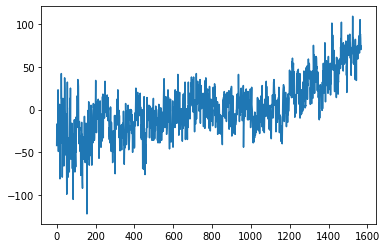

In [67]:
plt.plot(T)

In [68]:
T = np.array(T, dtype = np.float32)
T = pd.Series(T)

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

In [25]:
arma_order_select_ic(T.diff()[1:], ic = ["aic","bic"])

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

{'aic':               0             1             2
 0  13681.378203  13333.975404  13291.405289
 1  13460.916133  13267.866808  13238.776670
 2  13398.530891  13244.587024  13239.225884
 3  13373.736894  13241.759996  13237.947141
 4  13351.545790  13243.466641  13245.474538,
 'bic':               0             1             2
 0  13692.092040  13350.046159  13312.832962
 1  13476.986887  13289.294481  13265.561261
 2  13419.958564  13271.371615  13271.367394
 3  13400.521485  13273.901506  13275.445569
 4  13383.687300  13280.965068  13288.329884,
 'aic_min_order': (3, 2),
 'bic_min_order': (1, 2)}

In [31]:
model = ARIMA(T, order = (3,1,2))
mod = model.fit()
mod.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -6615.347
Date:                Fri, 16 Dec 2022   AIC                          13242.694
Time:                        08:37:51   BIC                          13274.836
Sample:                             0   HQIC                         13254.642
                               - 1568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0458      0.234      4.471      0.000       0.587       1.504
ar.L2         -0.1432      0.100     -1.432      0.152      -0.339       0.053
ar.L3         -0.0374      0.048     -0.776      0.438      -0.132       0.057
ma.L1         -1.5999      0.232     -6.908      0.000      -2.054      -1.146
ma.L2          0.6097      0.224      2.723      0.006       0.171       1.048
sigma2       273.6430      8.011     34.157      0.000     257.941     289.345
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               116.89
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
mod = ARIMA(T, order = (1,1,2))
model = mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -6616.555
Date:                Fri, 16 Dec 2022   AIC                          13241.110
Time:                        08:41:06   BIC                          13262.538
Sample:                             0   HQIC                         13249.075
                               - 1568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7392      0.035     21.132      0.000       0.671       0.808
ma.L1         -1.2979      0.047    -27.722      0.000      -1.390      -1.206
ma.L2          0.3188      0.043      7.391      0.000       0.234       0.403
sigma2       272.0860      7.816     34.810      0.000     256.766     287.406
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               118.84
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

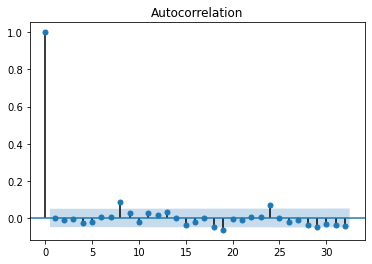

In [48]:
plot_acf(model.resid);

In [46]:
acorr_ljungbox(model.resid, return_df =True) 

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.001385,0.970308
2,0.172010,0.917589
3,0.186983,0.979663
4,1.176882,0.881890
5,1.763900,0.880753
6,1.786955,0.938213
7,1.868550,0.966756
8,13.162869,0.106367
9,14.271838,0.112979
10,15.029806,0.130979


In [69]:
par = []
for i in range(1, 3):
  for j in range(0,2):
    mod = ARIMA(T, order = (i,0,j), trend = "ct")
    model = mod.fit()
    print(i,j, model.aic, model.bic)

1 0 13384.553944362644 13405.984169166286
1 1 13275.874562995596 13302.662344000148
2 0 13305.376360345732 13332.164141350284
2 1 13257.967244639907 13290.11258184537


In [110]:
L = [1,8,24]

In [118]:
mod = ARIMA(T, order = (24,0,1), trend = "ct", enforce_stationarity = False)
####
with mod.fix_params({f"ar.L{i}":0 for i in range(1,24) if i not in L}):
  model = mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                ARIMA(24, 0, 1)   Log Likelihood               -6495.469
Date:                Fri, 16 Dec 2022   AIC                          13004.937
Time:                        09:15:50   BIC                          13042.332
Sample:                             0   HQIC                         13018.848
                               - 1568                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -38.0506      5.845     -6.510      0.000     -49.507     -26.594
x1                 0.0528      0.007      7.597      0.000       0.039       0.066
ar.L1              0.7903      0.022     35.406      0.000       0.747       0.834
ar.L2 (fixed)           0        nan        nan        nan         nan         nan
ar.L3 (fixed)           0        nan        nan        nan         nan         nan
ar.L4 (fixed)           0        nan        nan        nan         nan         nan
ar.L5 (fixed)           0        nan        nan        nan         nan         nan
ar.L6 (fixed)           0        nan        nan        nan         nan         nan
ar.L7 (fixed)           0        nan        nan        nan         nan         nan
ar.L8              0.0792      0.017      4.787      0.000       0.047       0.112
ar.L9 (fixed)           0        nan        nan        nan         nan         nan
ar.L10 (fixed)          0        nan        nan        nan         nan         nan
ar.L11 (fixed)          0        nan        nan        nan         nan         nan
ar.L12 (fixed)          0        nan        nan        nan         nan         nan
ar.L13 (fixed)          0        nan        nan        nan         nan         nan
ar.L14 (fixed)          0        nan        nan        nan         nan         nan
ar.L15 (fixed)          0        nan        nan        nan         nan         nan
ar.L16 (fixed)          0        nan        nan        nan         nan         nan
ar.L17 (fixed)          0        nan        nan        nan         nan         nan
ar.L18 (fixed)          0        nan        nan        nan         nan         nan
ar.L19 (fixed)          0        nan        nan        nan         nan         nan
ar.L20 (fixed)          0        nan        nan        nan         nan         nan
ar.L21 (fixed)          0        nan        nan        nan         nan         nan
ar.L22 (fixed)          0        nan        nan        nan         nan         nan
ar.L23 (fixed)          0        nan        nan        nan         nan         nan
ar.L24             0.0485      0.014      3.583      0.000       0.022       0.075
ma.L1             -0.3512      0.035    -10.067      0.000      -0.420      -0.283
sigma2           264.0051      7.846     33.648      0.000     248.627     279.383
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                83.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

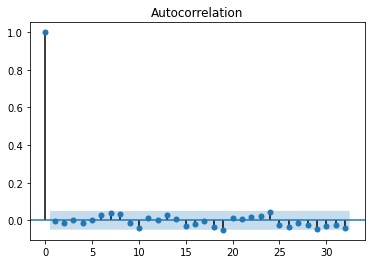

In [116]:
plot_acf(model.resid);

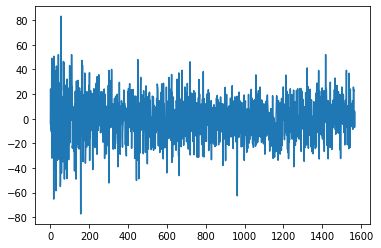

In [119]:
plt.plot(model.resid)

In [120]:
acorr_ljungbox(model.resid, return_df = True)

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


,lb_stat,lb_pvalue
1,0.024419,0.875824
2,0.237303,0.888117
3,0.245369,0.969953
4,0.608368,0.962129
5,0.608459,0.987613
6,2.039447,0.916035
7,4.352828,0.738359
8,6.077409,0.638561
9,6.328831,0.706610
10,9.229220,0.510497
